First Notebook

In [128]:
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
import pandas
import numpy as np

# string -> array
def parseArray(array):
    parsedArray = array[1:-1].replace('\n','').split(' ')
    parsedArray = filter(None,parsedArray)
    return np.array(list(parsedArray)).astype(float)

# array -> smoothed array
def smoothData(data,sigma):
    return gaussian_filter1d(data,sigma)

# radial profile array -> peaks array
def findPeaks(data):
    return find_peaks(data, height=0)[0]

# peaks array -> float
def firstPeak(data,range):
    peaks = list( filter(lambda peak: peak>range[0] and peak<range[1],data) )
    return -2 if len(peaks) == 0 else peaks[0]

# peaks array -> plot
def plotData(data,peaks,label):
    plt.plot(data, label=label)
    plt.plot(peaks, data[peaks], 'x')

In [130]:
import csv

def analyzeRadialProfiles(source_file,sink_file,sigma=1,range,plot=False):
    with open(source_file,'r') as csv_file:
        csv_reader = csv.DictReader(csv_file)

        with open(sink_file,'w') as new_file:
            fieldnames = ['','image','peak_distance']

            csv_writer = csv.DictWriter(new_file,fieldnames=fieldnames)

            csv_writer.writeheader()

            for index, line in enumerate(csv_reader):
                rp = line['radial_profile']
                peak_distance = -1

                if (rp != '-1'):
                    data = parseArray(rp)
                    data = smoothData(data,sigma)
                    peaks = findPeaks(data)

                    peak_distance = firstPeak(peaks,range)
                    
                    if (plot):
                        plotData(data,peaks,str(index)+' : '+line['image']+' : '+str(peak_distance))

                del line['radial_profile']

                line['peak_distance'] = peak_distance
                csv_writer.writerow(line)
    
    if (plot):
        plt.axvline(x = range[0], color='blue')
        plt.axvline(x = range[1], color='red')

        plt.legend()
        plt.show()

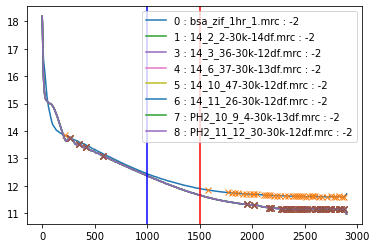

In [133]:
analyzeRadialProfiles('test.csv','test1.csv',sigma=5,range=(1000,1500),plot=True)